In [1]:
# !pip install --upgrade pip

In [2]:
# !pip install indic-nlp-library

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from indicnlp.tokenize import indic_tokenize
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [4]:
# Load the JSON data
with open('../../Dataset/train.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [5]:
# Extract domains, contexts, and QAs
domains = data['domains']

In [6]:
# Create lists to store data
contexts = []
questions = []
answers = []
domain_names = []

In [7]:
for domain in domains:
    domain_name = domain['domain']
    for context in domain['contexts']:
        for qa in context['qas']:
            domain_names.append(domain_name)
            contexts.append(context['context'])
            questions.append(qa['question'])
            answers.append(qa['answer'])

In [8]:
# Create a Pandas DataFrame
df = pd.DataFrame({
    'Domain': domain_names,
    'Context': contexts,
    'Question': questions,
    'Answer': answers
})

In [9]:
df.head()

,Domain,Context,Question,Answer
0,kund,भागीरथ कुंड पं. दीन दयाल उपाध्याय रेलवे स्टेशन...,भागीरथ कुंड पं. दीन दयाल उपाध्याय रेलवे स्टेशन...,भागीरथ कुंड पं. दीन दयाल उपाध्याय रेलवे स्टेशन...
1,kund,भागीरथ कुंड पं. दीन दयाल उपाध्याय रेलवे स्टेशन...,भागीरथ कुंड पं. दीन दयाल उपाध्याय रेलवे स्टेशन...,भागीरथ कुंड तक पहुँचने के लिए पं. दीन दयाल उपा...
2,kund,नारद कुंड में रात्रि प्रवास की कोई व्यवस्था नह...,क्या नारद कुंड में रात्रि प्रवास की व्यवस्था है?,"नहीं, नारद कुंड के पास रात्रि प्रवास की व्यवस्..."
3,kund,नारद कुंड में रात्रि प्रवास की कोई व्यवस्था नह...,क्या नारद कुंड में रात्रि प्रवास की व्यवस्था क...,"हाँ, नारद कुंड में रात्रि प्रवास की व्यवस्था क..."
4,kund,नारद कुंड में रात्रि प्रवास की कोई व्यवस्था नह...,नारद कुंड में रात्रि प्रवास कहाँ करना होता है?,नारद कुंड में रात्रि प्रवास की व्यवस्था नहीं ह...


In [10]:
df.to_csv('train.csv', index=False)

In [11]:
# Perform analysis

## 1. Domain Distribution
domain_dist = df['Domain'].value_counts()
print("Domain Distribution:")
print(domain_dist)

Domain Distribution:
Domain
temple         5592
travel         3575
ashram         2303
kund           1055
museum          446
general_qna      47
cruise           36
aarti            23
foodcourt         8
toilet            7
Name: count, dtype: int64


In [12]:
## 2. Context Length Distribution
context_len = df['Context'].apply(len)
print("Average Context Length:", context_len.mean())

Average Context Length: 471.98923006416135


In [13]:
## 3. Question Length Distribution
question_len = df['Question'].apply(len)
print("Average Question Length:", question_len.mean())

Average Question Length: 70.06278643446379


In [14]:
## 4. Answer Length Distribution
answer_len = df['Answer'].apply(len)
print("Average Answer Length:", answer_len.mean())

Average Answer Length: 89.29254506568897


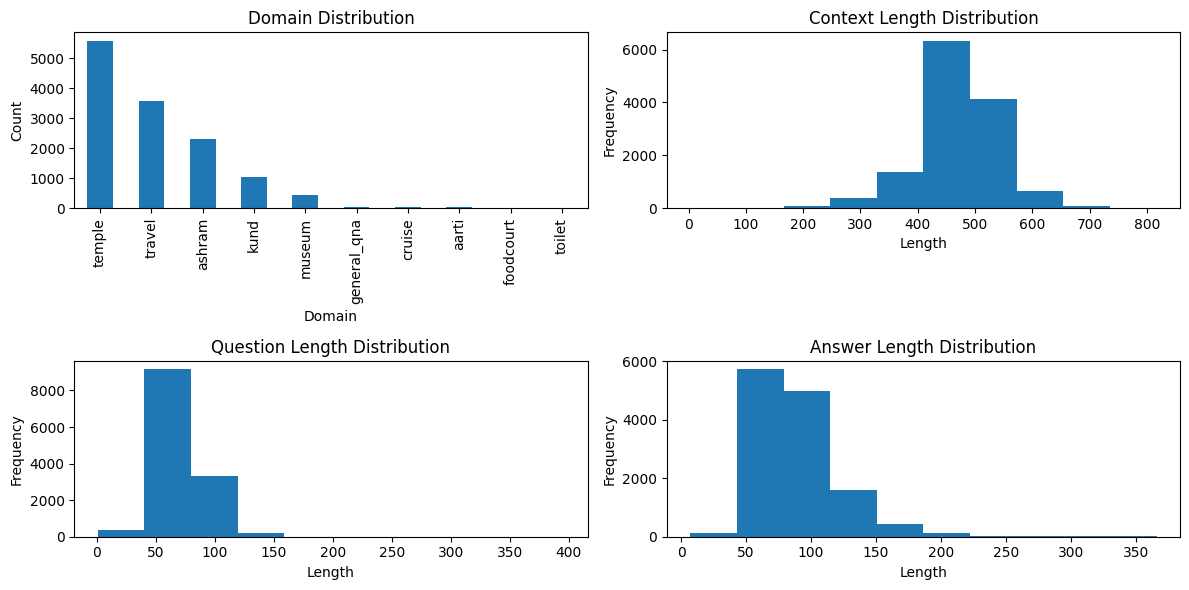

In [15]:
# Plot graphs
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
domain_dist.plot(kind='bar')
plt.title('Domain Distribution')
plt.xlabel('Domain')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(context_len, bins=10)
plt.title('Context Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(question_len, bins=10)
plt.title('Question Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(answer_len, bins=10)
plt.title('Answer Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
df['Context'][0],len(df['Context'][0])

('भागीरथ कुंड पं. दीन दयाल उपाध्याय रेलवे स्टेशन से 14.1 किलोमीटर दूर है। स्टेशन से कुंड तक पहुँचने के लिए टैक्सी, कैब, या बस सेवाओं का उपयोग किया जा सकता है। यह स्टेशन पूर्व में मुगलसराय के नाम से जाना जाता था और भारत के प्रमुख रेल जंक्शनों में से एक है। यहाँ से भागीरथ कुंड तक की यात्रा वाराणसी की ऐतिहासिक गलियों और घाटों के दृश्य प्रदान करती है। इस यात्रा में भक्तों को वाराणसी की सांस्कृतिक विरासत का अनुभव मिलता है, जो इस धार्मिक स्थल के महत्व को और भी बढ़ा देता है।',
 470)

In [17]:
print(df['Context'][0].split(' '), len(df['Context'][0].split(' ')))

['भागीरथ', 'कुंड', 'पं.', 'दीन', 'दयाल', 'उपाध्याय', 'रेलवे', 'स्टेशन', 'से', '14.1', 'किलोमीटर', 'दूर', 'है।', 'स्टेशन', 'से', 'कुंड', 'तक', 'पहुँचने', 'के', 'लिए', 'टैक्सी,', 'कैब,', 'या', 'बस', 'सेवाओं', 'का', 'उपयोग', 'किया', 'जा', 'सकता', 'है।', 'यह', 'स्टेशन', 'पूर्व', 'में', 'मुगलसराय', 'के', 'नाम', 'से', 'जाना', 'जाता', 'था', 'और', 'भारत', 'के', 'प्रमुख', 'रेल', 'जंक्शनों', 'में', 'से', 'एक', 'है।', 'यहाँ', 'से', 'भागीरथ', 'कुंड', 'तक', 'की', 'यात्रा', 'वाराणसी', 'की', 'ऐतिहासिक', 'गलियों', 'और', 'घाटों', 'के', 'दृश्य', 'प्रदान', 'करती', 'है।', 'इस', 'यात्रा', 'में', 'भक्तों', 'को', 'वाराणसी', 'की', 'सांस्कृतिक', 'विरासत', 'का', 'अनुभव', 'मिलता', 'है,', 'जो', 'इस', 'धार्मिक', 'स्थल', 'के', 'महत्व', 'को', 'और', 'भी', 'बढ़ा', 'देता', 'है।'] 95


In [18]:
df['Question'][0], len(df['Question'][0])

('भागीरथ कुंड पं. दीन दयाल उपाध्याय रेलवे स्टेशन से कितना किलोमीटर दूर है?',
 72)

In [19]:
print(df['Question'][0].split(' '), len(df['Question'][0].split(' ')))

['भागीरथ', 'कुंड', 'पं.', 'दीन', 'दयाल', 'उपाध्याय', 'रेलवे', 'स्टेशन', 'से', 'कितना', 'किलोमीटर', 'दूर', 'है?'] 13


In [20]:
df['Answer'][0], len(df['Answer'][0])

('भागीरथ कुंड पं. दीन दयाल उपाध्याय रेलवे स्टेशन से 14.1 किलोमीटर दूर है।', 71)

In [21]:
print(df['Answer'][0].split(' '), len(df['Answer'][0].split(' ')))

['भागीरथ', 'कुंड', 'पं.', 'दीन', 'दयाल', 'उपाध्याय', 'रेलवे', 'स्टेशन', 'से', '14.1', 'किलोमीटर', 'दूर', 'है।'] 13


In [25]:
len(df['Question']), len(set(df['Context']))

(13092, 5244)